In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math
import seaborn as sns
import string
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
import statistics
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding, Input
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Krist\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [50]:
df1=pd.read_csv(r'C:\Users\Krist\OneDrive\Desktop\d213 task 2\imdb_labelled.txt', sep='\t', header=None, names =['Review', 'Rating'])
df2=pd.read_csv(r'C:\Users\Krist\OneDrive\Desktop\d213 task 2\amazon_cells_labelled.txt', sep='\t', header=None, names =['Review', 'Rating'])
df3=pd.read_csv(r'C:\Users\Krist\OneDrive\Desktop\d213 task 2\yelp_labelled.txt', sep='\t', header=None, names =['Review', 'Rating'])


In [51]:
df=pd.concat([df1, df2, df3], axis=0)

In [4]:
#determine if any null present
df.isnull().sum()

Review    0
Rating    0
dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

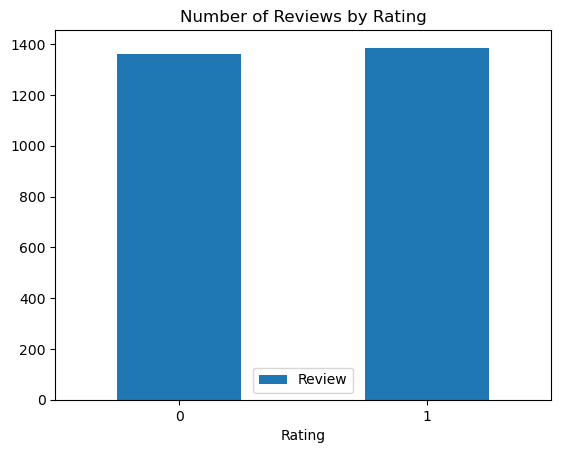

In [5]:
#graphical representation of ratings
ax=df.groupby('Rating').count().plot.bar(ylim=0)
ax.set_title('Number of Reviews by Rating')
plt.xticks(rotation=0)

In [52]:
#Code from Analytics Vidhya
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['Review']=df['Review'].apply(lambda x:expand_contractions(x))


In [53]:
#all lower case letters
df['Review']=df['Review'].apply(lambda x: x.lower())

In [54]:
#remove punctuation
df['Review']=df['Review'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [55]:
#remove extra spaces
df['Review']=df['Review'].apply(lambda x: re.sub(' +',' ',x))

In [56]:
#change numbers within the strings of text from numerical to XXXX representation
# Mapping dictionary for integer to word conversion
mapping_dict = {
    '0': 'zero',
    '1': 'one',
    '2': 'two',
    '3': 'three',
    '4': 'four',
    '5':'five',
    '6': 'six',
    '7': 'seven',
    '8': 'eight',
    '9': 'nine',
    '10': 'ten'
}

# Function to replace integers with words
def replace_integers_with_words(text):
    for key, value in mapping_dict.items():
        text = re.sub(r'\b' + key + r'\b', value, text)
    return text

# Convert integers to words in the 'Review' column
df['Review'] = df['Review'].apply(replace_integers_with_words)


In [57]:
# code from https://www.kaggle.com/code/akashkumar01/sentiment-analysis-on-amazon-yelp-and-imdb-data/notebook
# Removing Stop Words


stopwords_set = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in str(text).split() if word not in stopwords_set])

df['Review'] = df['Review'].apply(remove_stopwords)


In [58]:
stemmer = PorterStemmer()

# Define the stem_text function
def stem_text(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    
    # Stem each token
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    # Join the stemmed tokens back into a string
    stemmed_text = ' '.join(stemmed_tokens)
    
    return stemmed_text

# Apply the stemming function to the 'Review' column
df['stemmed_review'] = df['Review'].apply(stem_text)


In [63]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


max_length = 15

# Initialize the tokenizer
tokenizer = Tokenizer()

# Fit the tokenizer on the 'stemmed_review' column
tokenizer.fit_on_texts(df['stemmed_review'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['stemmed_review'])

# Pad the sequences with 0
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post', value=0)

# Update 'review_token' column with the padded sequences
df['review_token'] = padded_sequences.tolist()




In [64]:
df.head()

,Review,Rating,stemmed_review,review_token
0,slowmoving aimless movie distressed drifting y...,0,slowmov aimless movi distress drift young man,"[1817, 1818, 3, 1819, 1237, 745, 248, 0, 0, 0,..."
1,sure lost flat characters audience nearly half...,0,sure lost flat charact audienc nearli half walk,"[202, 381, 746, 35, 640, 747, 382, 475, 0, 0, ..."
2,attempting artiness black white clever camera ...,0,attempt arti black white clever camera angl mo...,"[420, 1820, 181, 249, 553, 160, 748, 3, 33, 12..."
3,little music anything speak,0,littl music anyth speak,"[71, 182, 251, 749, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,best scene movie gerardo trying find song keep...,1,best scene movi gerardo tri find song keep run...,"[23, 74, 3, 1822, 55, 146, 343, 275, 316, 641,..."


In [65]:
vocab_size=len(df['review_token']) +1
print(vocab_size)

2749


In [71]:
df['review_v'] = df['review_token'].apply(lambda x: ' '.join(map(str, x)))

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the 'review_v' column
vectorized_reviews = vectorizer.fit_transform(df['review_v'])
V_features = pd.DataFrame(vectorized_reviews.toarray())
V_features.to_csv('vectorized_data')

dense_array = V_features.to_numpy()
tensor = tf.convert_to_tensor(dense_array)


In [78]:
df.to_csv(r'C:\Users\Krist\OneDrive\Desktop\d213 task 2\df.csv')

In [88]:
target=df['Rating']

X = tensor
y = target

# Convert TensorFlow tensors to NumPy arrays
X_np = X.numpy()
y_np = np.array(y)

# Split data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Convert NumPy arrays back to TensorFlow tensors
X_train = tf.convert_to_tensor(X_train)
X_val = tf.convert_to_tensor(X_val)
X_test = tf.convert_to_tensor(X_test)


In [89]:
model = Sequential()
model.add(Dense(units=2749, activation='relu')) #nodes=vocab size
model.add(Dense(units=1533, activation='relu')) #nodes = 2/3 input node size
model.add(Dense(units=533, activation='relu')) #nodes= above layer - 1000
model.add(Dense(units=267, activation='relu')) #nodes = 1/2 above layer
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [91]:
# Train the model
# Create an instance of the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model with the EarlyStopping callback

history= model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

Epoch 1/100
55/55 [==============================] - 10s 184ms/step - loss: 0.1870 - accuracy: 0.9374 - val_loss: 0.6428 - val_accuracy: 0.7386
Epoch 2/100
55/55 [==============================] - 10s 187ms/step - loss: 0.0381 - accuracy: 0.9875 - val_loss: 0.9993 - val_accuracy: 0.7341
Epoch 3/100
55/55 [==============================] - 10s 187ms/step - loss: 0.0207 - accuracy: 0.9937 - val_loss: 1.1163 - val_accuracy: 0.7295
Epoch 4/100
18/18 [==============================] - 0s 21ms/step - loss: 0.6561 - accuracy: 0.7655
Test Accuracy: 0.7654545307159424


In [92]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 2749)              10338989  
                                                                 
 dense_6 (Dense)             (None, 1533)              4215750   
                                                                 
 dense_7 (Dense)             (None, 533)               817622    
                                                                 
 dense_8 (Dense)             (None, 267)               142578    
                                                                 
 dense_9 (Dense)             (None, 1)                 268       
                                                                 
Total params: 15,515,207
Trainable params: 15,515,207
Non-trainable params: 0
_________________________________________________________________
None


In [93]:
# Extract the loss and accuracy values from the history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

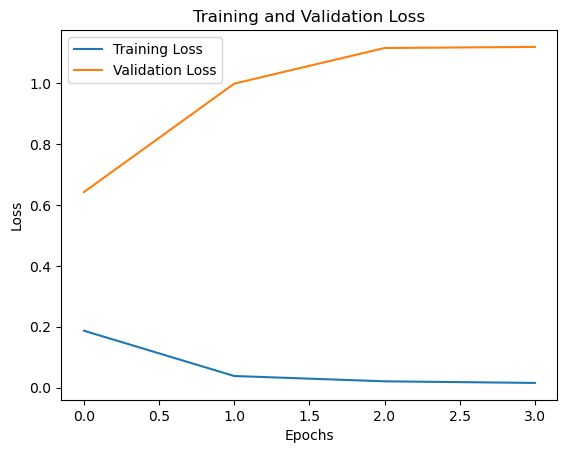

In [94]:
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

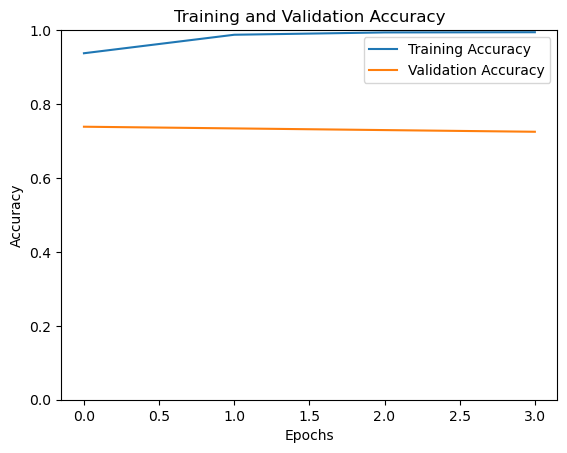

In [96]:
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

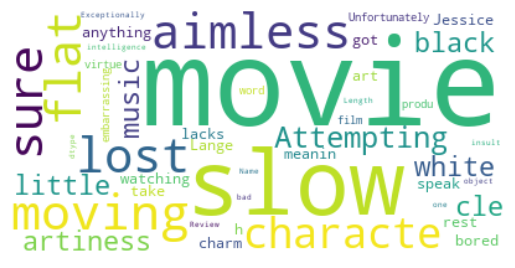

In [97]:
filtered_df1 = df1[df1['Rating'] == 0].copy()
cloud = WordCloud(background_color='white').generate(str(filtered_df1.Review))
plt.imshow(cloud, interpolation='bilinear')  
plt.axis('off')
# Display the figure
plt.show()

In [98]:
model.save('sentiment_analysis')

INFO:tensorflow:Assets written to: sentiment_analysis\assets


INFO:tensorflow:Assets written to: sentiment_analysis\assets
